# Linear regression with multiple variables
In this project, we will implement linear regression with multiple variables to predict the prices of houses. Suppose we are selling our house and we want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. 

Our data contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in sqaure feet), the second column is the number of bedrooms, and the thrid column is the price of the house.

We will write functions to 
- normalize features, 
- compute cost functions, 
- perform gradient descent with multiple variables,
- solve normal equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Feature Normalization

In [2]:
# load data
data = open('ex1data2.txt').read()
data

'2104,3,399900\n1600,3,329900\n2400,3,369000\n1416,2,232000\n3000,4,539900\n1985,4,299900\n1534,3,314900\n1427,3,198999\n1380,3,212000\n1494,3,242500\n1940,4,239999\n2000,3,347000\n1890,3,329999\n4478,5,699900\n1268,3,259900\n2300,4,449900\n1320,2,299900\n1236,3,199900\n2609,4,499998\n3031,4,599000\n1767,3,252900\n1888,2,255000\n1604,3,242900\n1962,4,259900\n3890,3,573900\n1100,3,249900\n1458,3,464500\n2526,3,469000\n2200,3,475000\n2637,3,299900\n1839,2,349900\n1000,1,169900\n2040,4,314900\n3137,3,579900\n1811,4,285900\n1437,3,249900\n1239,3,229900\n2132,4,345000\n4215,4,549000\n2162,4,287000\n1664,2,368500\n2238,3,329900\n2567,4,314000\n1200,3,299000\n852,2,179900\n1852,4,299900\n1203,3,239500\n'

In [3]:
def getdata(s):
    X = []
    y = []
    for row in s.split('\n'):
        if row != '':
            pair = row.split(',')
            X.append(np.array([float(pair[0]),float(pair[1])]))
            y.append(np.array([float(pair[2])]))
    X = np.array(X)
    y = np.array(y)
    return X, y

In [4]:
X,y = getdata(data)
m = len(y)

In [5]:
# print out some data points
print('First 10 examples from the dataset:')
print(X[0:3])
print(y[0:3])

First 10 examples from the dataset:
[[2104.    3.]
 [1600.    3.]
 [2400.    3.]]
[[399900.]
 [329900.]
 [369000.]]


In [6]:
# featurenomalize normalizes the features in X
# the function returns a normalized version of X where the mean value of each
# feature is 0 and the standard deviation is 1.
def featureNormalize(X):
    X_norm = np.zeros([X.shape[0],X.shape[1]])
    mu = np.zeros([1,X.shape[1]])
    sigma = np.zeros([1,X.shape[1]])
    for i in range(X.shape[1]):
        mu[0][i] = X[:,i].mean()
        sigma[0][i] = X[:,i].std()
        X_norm[:,i] = (X[:,i]-mu[0][i])/sigma[0][i]
    return X_norm, mu, sigma

In [7]:
[X_norm, mu,sigma] = featureNormalize(X)

In [8]:
# add intercept term to X_norm
X_norm_withones = np.append(np.ones([m,1]), X_norm, 1)

## Gradient Descent

In [9]:
# computeCostMulti compute cost for linear regression with multiple variables
def computeCostMulti(X,y,theta):
    m = len(y)
    J = 0
    diff = np.dot(X,theta) -y
    J = np.dot(diff.transpose(),diff)/(2*m)
    return J

In [10]:
# gredientDescentMulti performs gradient descent to learn theta
def gradientDescentMulti(X,y,theta, alpha,num_iters):
    m = len(y)
    n = X.shape[0]+1
    J_history = np.zeros([num_iters,1])
    for iter in range(num_iters):
        D = np.dot(X,theta)-y      
        coe = alpha/m
        theta_temp = np.zeros([n,1])
        theta_temp = theta - coe*np.dot(X.transpose(),D)
        theta = theta_temp
        J_history[iter][0] = computeCostMulti(X,y,theta)
    return theta, J_history

In [11]:
alpha = 0.01
num_iters = 400
theta = np.zeros([3,1])

In [12]:
[theta,J_history] = gradientDescentMulti(X_norm_withones,y,theta,alpha,num_iters)

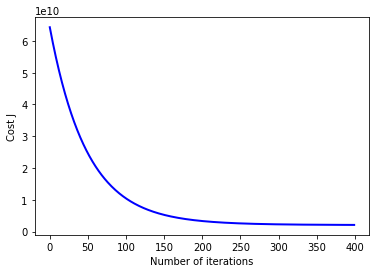

In [13]:
# plot the convergence graph
plt.plot(J_history,'-',color= 'blue',linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [14]:
# display gradient descent's result
print('Theta computed from gradient descent:')
print(theta)

Theta computed from gradient descent:
[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [15]:
# Estimate the price of a 1650 sq-ft, 4br house
u = np.zeros([1,3])
u[0][0] = 1
u[0][1] = (1650-mu[0][0])/sigma[0][0]
u[0][2] = (3-mu[0][1])/sigma[0][1]
price = np.dot(u,theta)

In [16]:
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent is:\n {}'.format(price[0][0]))

Predicted price of a 1650 sq-ft, 3 br house using gradient descent is:
 289221.547371


## Normal Equations

In [17]:
# normalEqn computes the closed-form solution to linear regression
def normalEqn(X,y):
    theta = np.zeros([X.shape[1],1])
    theta = np.dot(np.linalg.pinv(np.dot(X.transpose(),X)),np.dot(X.transpose(),y))
    return theta

In [18]:
X_withones = np.append(np.ones([m,1]), X, 1)
theta_ne = normalEqn(X_withones,y)

In [19]:
# display normal equation's result
print('Theta computed from the normal equations:')
print(theta_ne)

Theta computed from the normal equations:
[[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


In [20]:
# Estimate the price of a 1650 sq-ft 3 br house
price = np.dot(np.array([1,1650,3]),theta_ne)
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent is:\n {}'.format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house using gradient descent is:
 293081.464335
